In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


In [22]:
import nbconvert
import numpy as np # linear algebra
import pandas as pd # data processing with dataframes
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting

df= pd.read_csv("../input/bank-customer-churn-modeling/Churn_Modelling.csv")

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [25]:
print(df['Gender'].unique())
print(df['Geography'].unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


0    7963
1    2037
Name: Exited, dtype: int64
Percentage of values in the positive class = 20.37


<AxesSubplot:xlabel='Exited', ylabel='count'>

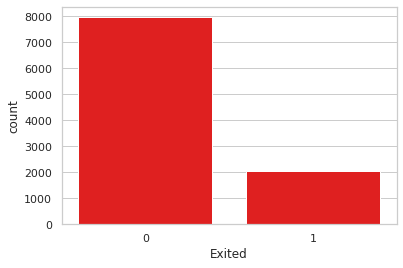

In [26]:
print(df['Exited'].value_counts())
class_1=len(df[df['Exited']==1])/len(df['Exited'])*100
print('Percentage of values in the positive class = {:.2f}'.format(class_1))
sns.countplot(x=df['Exited'],color='red')

In [27]:
data= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).copy()
data.head()
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [28]:
df_gender=data.groupby(['Gender']).size().reset_index(name='Count')
#print(df_gender['Counts'])
df_gender['Proportion']= df_gender.apply(lambda x: x['Count']/np.sum(df_gender['Count']), axis=1)
print(df_gender)

df_gender_exited=data.groupby(['Gender'])['Exited'].sum().reset_index(name='Sum')
df_gender_exited['Proportion']= df_gender_exited.apply(lambda x: x['Sum']/np.sum(df_gender_exited['Sum']),\
                                                       axis=1)
print(df_gender_exited)

   Gender  Count  Proportion
0  Female   4543      0.4543
1    Male   5457      0.5457
   Gender   Sum  Proportion
0  Female  1139    0.559156
1    Male   898    0.440844


In [29]:
df_geo=data.groupby(['Geography']).size().reset_index(name='Count')
#print(df_gender['Counts'])
df_geo['Proportion']= df_geo.apply(lambda x: x['Count']/np.sum(df_geo['Count']), axis=1)
print(df_geo)

df_geo_exited=data.groupby(['Geography'])['Exited'].sum().reset_index(name='Sum')
df_geo_exited['Proportion_exit']= df_geo_exited.apply(lambda x: x['Sum']/np.sum(df_geo_exited['Sum']),\
                                                       axis=1)
print(df_geo_exited)

  Geography  Count  Proportion
0    France   5014      0.5014
1   Germany   2509      0.2509
2     Spain   2477      0.2477
  Geography  Sum  Proportion_exit
0    France  810         0.397644
1   Germany  814         0.399607
2     Spain  413         0.202749


<Figure size 432x288 with 0 Axes>

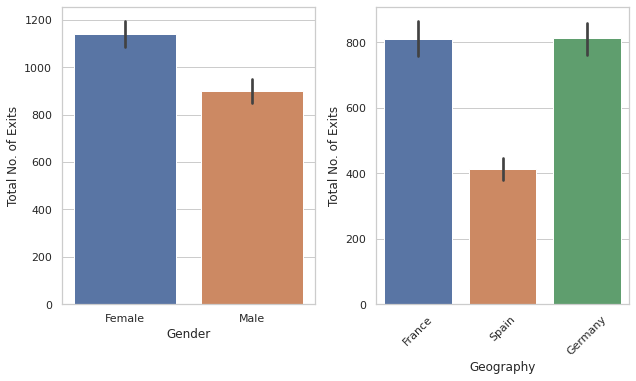

In [30]:
#Using seaborn to draw 4 barplots for 4 different categorical variab;es
sns.set_theme(style='whitegrid')

fig = plt.figure()

fig, axes = plt.subplots(1,2,figsize=(9, 5))

ax1=sns.barplot(data = data, x='Gender', y='Exited',estimator=sum, ax=axes[0])
ax1.set( ylabel='Total No. of Exits')

ax2=sns.barplot(data = data, x='Geography', y='Exited',estimator=sum, ax=axes[1])
ax2.set( ylabel='Total No. of Exits')

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()

In [31]:
data_1=pd.get_dummies(data, columns=['Gender'],  drop_first=True,prefix='Gend_').copy()
encoded_data=pd.get_dummies(data_1, columns=['Geography'], drop_first=True, prefix='Geog_').copy()

encoded_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gend__Male,Geog__Germany,Geog__Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [32]:
from sklearn.preprocessing import StandardScaler

#drop target column
#encoded_data.drop(['Exited'], axis=1, inplace=True)
#using standard scaler

features_scaled=['CreditScore',  'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']
for i in features_scaled:
    encoded_data[i] = StandardScaler().fit_transform(encoded_data[[i]])
encoded_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gend__Male,Geog__Germany,Geog__Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1


In [50]:
#import necessary packages for building a logistic regression mode and Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#import necessary packages for evaluation metrics
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

X=encoded_data.drop(['Exited'], axis=1)
y=encoded_data['Exited']

xTrain, xTest, yTrain, yTest = train_test_split(
        X, y, test_size = 0.2, random_state = 42)

In [34]:
#building the Random forest classifier from our sampled training data
rfc = RandomForestClassifier()
# fitting the classifier to the oversampled training data
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)
print(yPred)

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(xTrain, yTrain)

# Predict the labels of the test set
y_pred_log = logreg.predict(xTest)

[0 0 0 ... 1 0 0]


Model: Random Forest classifier
Accuracy: 0.868
Precision: 0.7654320987654321
Recall: 0.4732824427480916
F1 Score 0.5849056603773585


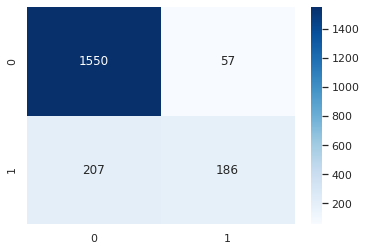



Model: Logistic Regression
Accuracy: 0.7195
Precision for logReg: 0.38461538461538464
Recall: 0.712468193384224
F1 Score 0.49955396966993754
[[1159  448]
 [ 113  280]]


In [35]:
print("Model: Random Forest classifier")

#Computing the accuracy, precision, recall and F1 score for the RF classifier
acc = accuracy_score(yTest, yPred)
print("Accuracy: {}".format(acc))
prec = precision_score(yTest, yPred)
print("Precision: {}".format(prec))
rec = recall_score(yTest, yPred)
print("Recall: {}".format(rec))
f1 = f1_score(yTest, yPred)
print("F1 Score {}".format(f1))
cf_matrix=confusion_matrix(yTest, yPred)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
plt.show()

print("\n\nModel: Logistic Regression")
#Computing the accuracy, precision, recall and F1 score for the Ogistic Regression model
acc = accuracy_score(yTest, y_pred_log)
print("Accuracy: {}".format(acc))
prec_log = precision_score(yTest, y_pred_log)
print("Precision for logReg: {}".format(prec_log))
rec_log = recall_score(yTest, y_pred_log)
print("Recall: {}".format(rec_log))
f1 = f1_score(yTest, y_pred_log)
print("F1 Score {}".format(f1))
print(confusion_matrix(yTest, y_pred_log))

In [47]:
from imblearn.over_sampling import SMOTE

sm  = SMOTE(random_state = 2)

xTrain_smote, yTrain_smote = sm.fit_resample(xTrain, yTrain.ravel())

print (xTrain.shape)
print (yTrain.shape)

print (xTrain_smote.shape)
print (yTrain_smote.shape)

print (xTrain.head(2))

(8000, 11)
(8000,)
(12712, 11)
(12712,)
      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
9254     0.367013 -0.660018  0.341352 -1.225848       0.807737          1   
1561    -0.191713  0.293517 -0.350204  0.691389       0.807737          1   

      IsActiveMember  EstimatedSalary  Gend__Male  Geog__Germany  Geog__Spain  
9254               1         1.373784           1              0            0  
1561               1         1.667407           1              1            0  


In [45]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(xTrain_smote, yTrain_smote)

# Predict the labels of the test set
y_pred_log = logreg.predict(xTest)

print("\n\nModel: Logistic Regression")
#Computing the accuracy, precision, recall and F1 score for the Ogistic Regression model
acc = accuracy_score(yTest, y_pred_log)
print("Accuracy: {}".format(acc))
prec_log = precision_score(yTest, y_pred_log)
print("Precision for logReg: {}".format(prec_log))
rec_log = recall_score(yTest, y_pred_log)
print("Recall: {}".format(rec_log))
f1 = f1_score(yTest, y_pred_log)
print("F1 Score {}".format(f1))
print(confusion_matrix(yTest, y_pred_log))
print(classification_report(yTest, y_pred_log))



Model: Logistic Regression
Accuracy: 0.72
Precision for logReg: 0.38288920056100983
Recall: 0.6946564885496184
F1 Score 0.49367088607594933
[[1167  440]
 [ 120  273]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.38      0.69      0.49       393

    accuracy                           0.72      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.72      0.75      2000



In [55]:
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(xTrain_smote, yTrain_smote)

# Predict the labels of the test set
y_pred_svc = svc.predict(xTest)

print("\n\nModel: Logistic Regression")
#Computing the accuracy, precision, recall and F1 score for the Ogistic Regression model
acc = accuracy_score(yTest, y_pred_svc)
print("Accuracy: {}".format(acc))
prec = precision_score(yTest, y_pred_svc)
print("Precision for logReg: {}".format(prec))
rec = recall_score(yTest, y_pred_svc)
print("Recall: {}".format(rec))
f1 = f1_score(yTest, y_pred_svc)
print("F1 Score {}".format(f1))
print(confusion_matrix(yTest, y_pred_svc))
print(classification_report(yTest, y_pred_svc))



Model: Logistic Regression
Accuracy: 0.798
Precision for logReg: 0.4907563025210084
Recall: 0.7430025445292621
F1 Score 0.5910931174089068
[[1304  303]
 [ 101  292]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1607
           1       0.49      0.74      0.59       393

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



[0 0 0 ... 1 0 1]
Accuracy: 0.847
Precision: 0.610126582278481
Recall: 0.6132315521628499
F1 Score 0.6116751269035533


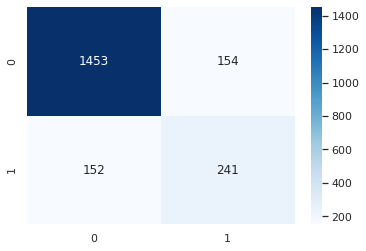

In [56]:
rfc = RandomForestClassifier()
# fitting the classifier to the oversampled training data
rfc.fit(xTrain_smote, yTrain_smote)
yPred = rfc.predict(xTest)
print(yPred)

#Computing the accuracy, precision, recall and F1 score for the RF classifier
acc = accuracy_score(yTest, yPred)
print("Accuracy: {}".format(acc))
prec = precision_score(yTest, yPred)
print("Precision: {}".format(prec))
rec = recall_score(yTest, yPred)
print("Recall: {}".format(rec))
f1 = f1_score(yTest, yPred)
print("F1 Score {}".format(f1))
cf_matrix=confusion_matrix(yTest, yPred)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
plt.show()

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xTrain_smote, yTrain_smote)

# Predict the labels of the test set
y_pred_xgb = xgb.predict(xTest)

print("\n\nModel: Logistic Regression")
#Computing the accuracy, precision, recall and F1 score for the XGB model
acc = accuracy_score(yTest, y_pred_xgb)
print("Accuracy: {}".format(acc))
prec = precision_score(yTest, y_pred_xgb)
print("Precision for logReg: {}".format(prec))
rec = recall_score(yTest, y_pred_xgb)
print("Recall: {}".format(rec))
f1 = f1_score(yTest, y_pred_xgb)
print("F1 Score {}".format(f1))
print(confusion_matrix(yTest, y_pred_xgb))
print(classification_report(yTest, y_pred_xgb))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model: Logistic Regression
Accuracy: 0.8575
Precision for logReg: 0.6646341463414634
Recall: 0.55470737913486
F1 Score 0.6047156726768378
[[1497  110]
 [ 175  218]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.66      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
